In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load train.csv
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
train_emotion = df_train['emotion']
train_pixels = df_train['pixels']

# Load test.csv
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")
test_pixels = df_test['pixels']

# Load icml_face_data.csv
df_icml = pd.read_csv("/content/drive/MyDrive/icml_face_data.csv")
icml_emotion = df_icml['emotion']
icml_pixels = df_icml[' pixels']
icml_usage = df_icml[' Usage']

# Convert string pixels to numeric values
train_pixels = train_pixels.apply(lambda x: np.array(x.split(), dtype=float))
test_pixels = test_pixels.apply(lambda x: np.array(x.split(), dtype=float))
icml_pixels = icml_pixels.apply(lambda x: np.array(x.split(), dtype=float))

# Split the train data into training and validation sets
train_pixels, val_pixels, train_emotion, val_emotion = train_test_split(train_pixels, train_emotion, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
train_pixels = scaler.fit_transform(train_pixels.tolist())
val_pixels = scaler.transform(val_pixels.tolist())
test_pixels = scaler.transform(test_pixels.tolist())
icml_pixels = scaler.transform(icml_pixels.tolist())

# Reduce dimensionality using PCA
pca = PCA(n_components=0.95)
train_pixels = pca.fit_transform(train_pixels)
val_pixels = pca.transform(val_pixels)
test_pixels = pca.transform(test_pixels)
icml_pixels = pca.transform(icml_pixels)

# Create and train the SVM model
svm = SVC()
svm.fit(train_pixels, train_emotion)

# Evaluate the model on the validation set
val_predictions = svm.predict(val_pixels)
accuracy = accuracy_score(val_emotion, val_predictions)
print("Validation Accuracy:", accuracy)

# Make predictions on the test set
test_predictions = svm.predict(test_pixels)

# Make predictions on the icml dataset
icml_predictions = svm.predict(icml_pixels)

Validation Accuracy: 0.4327760362243121


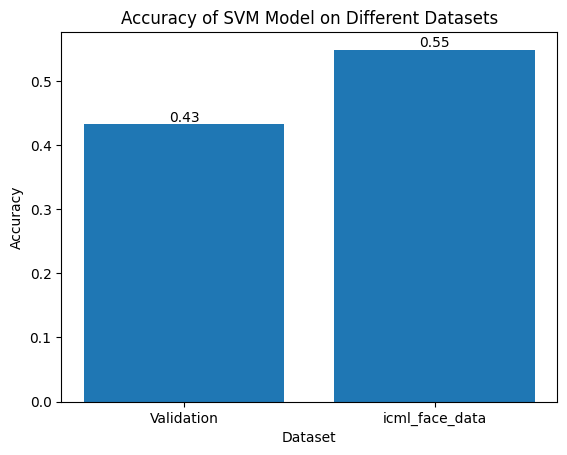

In [ ]:
import matplotlib.pyplot as plt

# Define the dataset names and accuracies
datasets = ['Validation', 'icml_face_data']
accuracies = [accuracy, accuracy_score(icml_emotion, icml_predictions)]

# Create a bar plot
plt.bar(datasets, accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model on Different Datasets')

# Add the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()
